In [3]:
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import statistics
import scipy.stats
from scipy.stats import gaussian_kde

In [4]:
priors_dict = {
    "captive_time": scipy.stats.lognorm(s=0.7, loc=0, scale=np.exp(3)),
    "div_time": scipy.stats.lognorm(s=0.7, loc=10000, scale=60000),
    "div_time_dom": scipy.stats.lognorm(s=0.5, loc=500, scale=3000),
    "div_time_scot": scipy.stats.lognorm(s=0.3, loc=0, scale=3000),
    "mig_rate_captive": scipy.stats.lognorm(s=1, loc=0, scale=0.07),
    "mig_rate_scot": scipy.stats.lognorm(s=1, loc=0, scale=0.07),
    "mig_length_scot": scipy.stats.lognorm(s=0.7, loc=0, scale=np.exp(3)),
    "pop_size_captive": scipy.stats.lognorm(s=0.6, loc=0, scale=100),
    "pop_size_domestic_1": scipy.stats.lognorm(s=1, loc=0, scale=60000),
    "pop_size_lyb_1": scipy.stats.lognorm(s=1, loc=0, scale=20000),
    "pop_size_lyb_2": scipy.stats.lognorm(s=1.5, loc=5000, scale=100000),
    "pop_size_scot_1": scipy.stats.lognorm(s=1, loc=0, scale=4000),
    "pop_size_eu_1": scipy.stats.lognorm(s=1.3, loc=0, scale=20000),
    "pop_size_eu_2": scipy.stats.lognorm(s=1, loc=0, scale=60000),
    "mutation_rate": scipy.stats.lognorm(s=1, loc=0, scale=1e-8),
    "recombination_rate": scipy.stats.lognorm(s=0.5, loc=0.4e-8, scale=9e-9)
}


theta = []
for key, prior in priors_dict.items():
    theta.append(prior.rvs(100000))
theta = np.concatenate(theta, axis=0)
print(np.shape(theta))
theta = np.reshape(theta, (16,100000))
print(np.shape(theta))

(1600000,)
(16, 100000)


In [5]:
theta2 = pd.read_csv("./tr2_100k.csv")
theta2 = theta2.to_numpy(dtype=np.float32)
np.shape(theta2)
theta3 = pd.read_csv("./tr3_100k.csv")
theta3 = theta3.to_numpy(dtype=np.float32)
np.shape(theta3)
#theta_4 = pd.read_csv("./tr4_jax_big_2.csv")
#theta_4 = theta_4.to_numpy(dtype=np.float32)
#np.shape(theta_4)

(100000, 16)

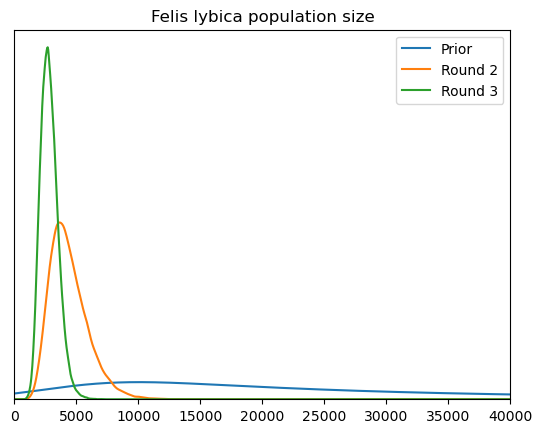

In [9]:
# Perform KDE
kde1 = gaussian_kde(theta[9][0:99999], bw_method=0.1)
kde2 = gaussian_kde(theta2[0:99999,9], bw_method=0.1)
kde3 = gaussian_kde(theta3[0:99999,9], bw_method=0.1)
# Generate a smooth range of x-values
x1_values = np.linspace(0, 40000, 1000)
x2_values = np.linspace(0, 40000, 1000)
x3_values = np.linspace(0, 40000, 1000)
#x2_values = np.linspace(0, max(theta[9][0:99999]), 1000)
# Get corresponding y-values for the KDE
y1_values = kde1(x1_values)
y2_values = kde2(x2_values)
y3_values = kde3(x3_values)
# Plot the smooth KDE curve
plt.plot(x1_values, y1_values, label="Prior")
plt.plot(x2_values, y2_values, label="Round 2")
plt.plot(x3_values, y3_values, label="Round 3")
# Show the plot
plt.xlim([0,40000])
plt.ylim(bottom=0)
plt.yticks([])
plt.title("Felis lybica population size")
plt.legend(loc='upper right')
plt.show()

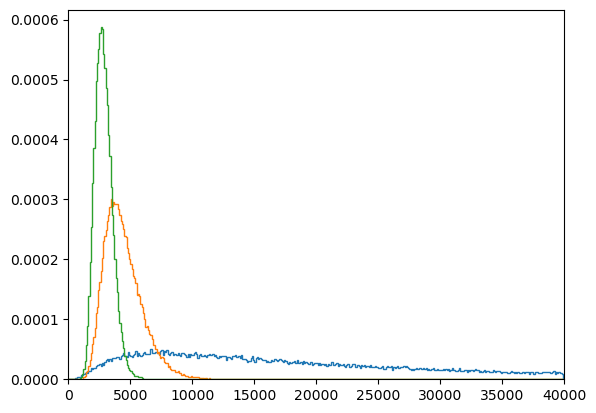

In [17]:
plt.hist(theta[9][0:99999], bins=np.arange(0, 40000, 100), density=True, histtype='step')
plt.hist(theta2[0:99999,9], bins=np.arange(0, 40000, 100), density=True, histtype='step')
plt.hist(theta3[0:99999,9], bins=np.arange(0, 40000, 100), density=True, histtype='step')
plt.xlim([0,40000])
plt.show()

In [ ]:
params = []

names = ["captive_time",
        "div_time",
        "div_time_dom",
        "div_time_scot",
        "mig_rate_captive",
        "mig_rate_scot",
        "mig_length_scot",
        "pop_size_captive",
        "pop_size_domestic_1",
        "pop_size_lyb_1",
        "pop_size_lyb_2",
        "pop_size_scot_1",
        "pop_size_eu_1",
        "pop_size_eu_2",
        "mutation_rate",
        "recombination_rate"
        ]

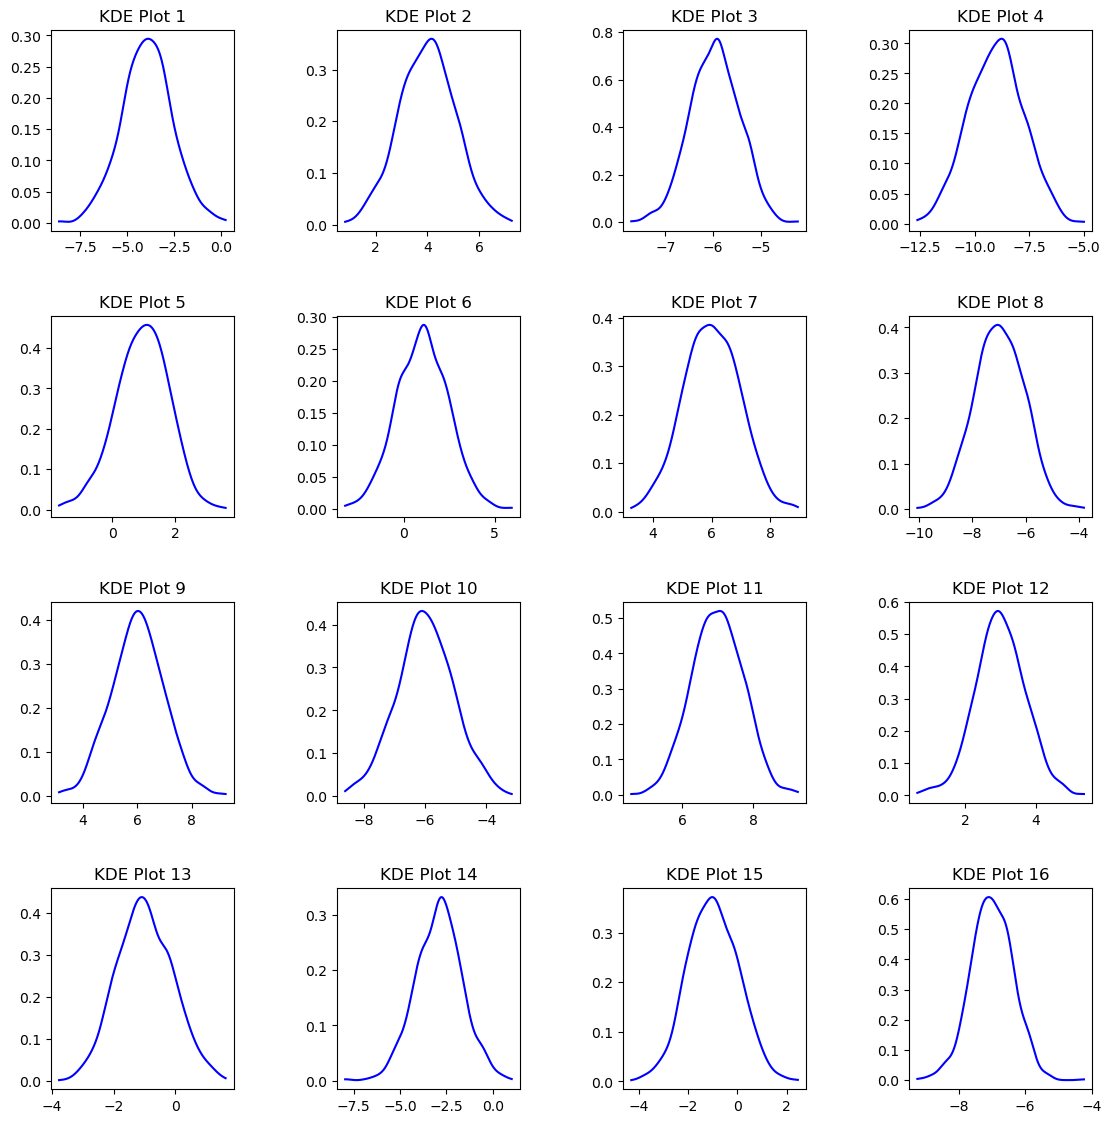

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Generate random data for demonstration
np.random.seed(42)  # For reproducibility
data = [np.random.normal(loc=np.random.randint(-10, 10), scale=np.random.rand() + 0.5, size=1000) for _ in range(16)]

# Set up the figure and axes for the 4x4 grid
fig, axes = plt.subplots(4, 4, figsize=(12, 12))
fig.tight_layout(pad=4.0)  # Adjust padding between plots

# Flatten the axes for easy iteration
axes = axes.flatten()

# Loop over each dataset and each axis to plot the KDE
for i, ax in enumerate(axes):
    # Compute Gaussian KDE
    kde = gaussian_kde(data[i])
    
    # Create a range for x-axis
    x_vals = np.linspace(min(data[i]), max(data[i]), 1000)
    
    # Plot the KDE on the respective subplot axis
    ax.plot(x_vals, kde(x_vals), color='blue')
    
    # Set title for each subplot
    ax.set_title(f'KDE Plot {i+1}')
    
# Show the plot
plt.show()